In [58]:
import pandas as pd
import matplotlib.pyplot  as plt

In [59]:
#Elijo el año de la elección y después abro el dataFrame.
anio_eleccion = "2011"
df = pd.read_csv (anio_eleccion+"/ResultadosElectorales.csv")

In [60]:
#Normalizo el df para que todos tengan un mismo criterio
df['cargo_nombre'] = df['cargo_nombre'].replace({'PRESIDENTE Y VICE': 'PRESIDENTE'})
df['cargo_nombre'] = df['cargo_nombre'].replace({'PRESIDENTE/A': 'PRESIDENTE'})
df['cargo_nombre'] = df['cargo_nombre'].replace({'JEFE/A DE GOBIERNO': 'JEFE DE GOBIERNO'})
df['cargo_nombre'] = df['cargo_nombre'].replace({'GOBERNADOR Y VICE': 'GOBERNADOR'})
df['cargo_nombre'] = df['cargo_nombre'].replace({'GOBERNADOR/A': 'GOBERNADOR'})
df['cargo_nombre'] = df['cargo_nombre'].replace({'DIPUTADO/A NACIONAL': 'DIPUTADO NACIONAL'})
df['cargo_nombre'] = df['cargo_nombre'].replace({'SENADOR/A NACIONAL': 'SENADOR NACIONAL'})
df['cargo_nombre'] = df['cargo_nombre'].replace({'DIPUTADOS/A NACIONAL': 'DIPUTADO NACIONAL'})
df['cargo_nombre'] = df['cargo_nombre'].replace({'SENADORES/A NACIONAL': 'SENADOR NACIONAL'})

In [61]:
#Nuevo dataFrame quitando columnas innecesarias
df_limpio = df[['padron_tipo', 'distrito_id', 'distrito_nombre','seccionprovincial_nombre', 'seccion_nombre', 'mesa_tipo','cargo_nombre', 'agrupacion_nombre', 'votos_tipo','votos_cantidad']]

In [62]:
#Obtengo listas de atributos sobre los que más adelante iteraré
cargos_elegibles = [cargo.upper() for cargo in df_limpio['cargo_nombre'].unique()]
tipos_votos = [tipo_voto.upper() for tipo_voto in df_limpio['votos_tipo'].unique()]
distritos = [distrito.upper() for distrito in df_limpio['distrito_nombre'].unique()]

In [63]:
#Selecciono los cargos que quiero buscar. En este caso, ejecutivos
cargos_principales = ['PRESIDENTE', 'JEFE DE GOBIERNO', 'GOBERNADOR']
df_cargos_principales =  df_limpio[df_limpio['cargo_nombre'].isin(cargos_principales)]

In [64]:
#Obtengo el total de votos por tipo por cargo principal
resultados_tipo_votos = []
for tipo_voto in tipos_votos:
    result = df_cargos_principales[(df_cargos_principales['votos_tipo'] == tipo_voto)].groupby('cargo_nombre')['votos_cantidad'].sum().reset_index()
    # Agregar el distrito al DataFrame resultado
    result['votos_tipo'] = tipo_voto
    # Almacenar el resultado en la lista
    resultados_tipo_votos.append(result)
df_resultados_tipo_votos = pd.concat(resultados_tipo_votos, ignore_index=True)
df_resultados_tipo_votos

,cargo_nombre,votos_cantidad,votos_tipo
0,GOBERNADOR,9169096,POSITIVO
1,PRESIDENTE,21484844,POSITIVO
2,GOBERNADOR,4264,IMPUGNADO
3,PRESIDENTE,7004,IMPUGNADO
4,GOBERNADOR,1275206,EN BLANCO
5,PRESIDENTE,678724,EN BLANCO
6,GOBERNADOR,3378,RECURRIDO
7,PRESIDENTE,16917,RECURRIDO
8,GOBERNADOR,69559,NULO
9,PRESIDENTE,206030,NULO


In [65]:

#votos positivos presidente por agrupacion
df_presidente = df_cargos_principales[(df_cargos_principales['cargo_nombre'] == 'PRESIDENTE')].groupby('agrupacion_nombre')['votos_cantidad'].sum()

In [66]:
#votos positivos jefe de gobierno por agrupacion
df_caba= df_cargos_principales[(df_cargos_principales['cargo_nombre'] == 'JEFE DE GOBIERNO')].groupby('agrupacion_nombre')['votos_cantidad'].sum()


In [67]:
#Categoría PRESIDENTE por provincia por agrupación
resultados_pte_prov = []

# Bucle para iterar sobre los distritos
for distrito in distritos:
    resultado_pte_prov = df_cargos_principales[(df_cargos_principales['cargo_nombre'] == 'PRESIDENTE') & (df_cargos_principales['distrito_nombre'].str.upper() == distrito)].groupby('agrupacion_nombre')['votos_cantidad'].sum().reset_index()
    # Agregar el distrito al DataFrame resultado
    resultado_pte_prov['distrito_nombre'] = distrito
    # Almacenar el resultado en la lista
    resultados_pte_prov.append(resultado_pte_prov)
resultados_pte_prov



[                                   agrupacion_nombre  votos_cantidad  \
 0  Alianza Compromiso Federal                    ...          614742   
 1  Alianza Frente Amplio Progresista             ...         1251277   
 2  Alianza Frente Popular                        ...          599068   
 3  Alianza Frente de Izquierda y de los Trabajado...          230721   
 4  Alianza Frente para la Victoria               ...         4704016   
 5  Alianza Unión para el Desarrollo Social       ...          810882   
 6  Coalición Cívica - Afirmación para una Repúbli...          147010   
 
   distrito_nombre  
 0    BUENOS AIRES  
 1    BUENOS AIRES  
 2    BUENOS AIRES  
 3    BUENOS AIRES  
 4    BUENOS AIRES  
 5    BUENOS AIRES  
 6    BUENOS AIRES  ,
                                    agrupacion_nombre  votos_cantidad  \
 0  Alianza Compromiso Federal                    ...          184116   
 1  Alianza Frente Amplio Progresista             ...          518069   
 2  Alianza Frente Popular

In [68]:
#Categoría PRESIDENTE por provincia por agrupación - exportación csv
# Concatenar todos los resultados en un solo DataFrame
df_resultados_pte_prov = pd.concat(resultados_pte_prov, ignore_index=True)

# Especificar la ruta donde deseas guardar el archivo CSV
ruta_csv = f'resultados_presidente_distritos{anio_eleccion}.csv'

# Exportar a CSV
df_resultados_pte_prov.to_csv(ruta_csv, index=False)

In [69]:

#provincias con elección a gobernador
distritos_gobernador = [distrito for distrito in df_cargos_principales[df_cargos_principales['cargo_nombre'] == 'GOBERNADOR']['distrito_nombre'].unique()]
distritos_gobernador

['JUJUY', 'ENTRE RÍOS', 'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'BUENOS AIRES']

In [70]:
#Categoría GOBERNADOR por provincia por agrupación
resultados_gob_prov = []
for distrito in distritos_gobernador:
    resultado = df_cargos_principales[(df_cargos_principales['cargo_nombre'] == 'GOBERNADOR') & (df_cargos_principales['distrito_nombre'] == distrito)].groupby('agrupacion_nombre')['votos_cantidad'].sum().reset_index()
    # Agregar el distrito al DataFrame resultado
    resultado['distrito_nombre'] = distrito
    # Almacenar el resultado en la lista
    resultados_gob_prov.append(resultado)
resultados_gob_prov

[                                   agrupacion_nombre  votos_cantidad  \
 0  Alianza Frente Amplio Progresista             ...            8951   
 1  Alianza Frente Primero Jujuy                  ...           29039   
 2  Alianza Frente de Izquierda y de los Trabajado...            5583   
 3  Alianza Frente para la Victoria               ...          160402   
 4  Alianza Unión para el Desarrollo Social       ...           73276   
 5  Nueva Izquierda                               ...            1508   
 6  Unión y Libertad                              ...            1975   
 
   distrito_nombre  
 0           JUJUY  
 1           JUJUY  
 2           JUJUY  
 3           JUJUY  
 4           JUJUY  
 5           JUJUY  
 6           JUJUY  ,
                                    agrupacion_nombre  votos_cantidad  \
 0  Alianza Frente Justicialista para la Victoria ...          358184   
 1  Frente Entrerriano Federal                    ...          117015   
 2  Frente Progresista Civ

In [71]:
#Categoría GOBERNADOR por provincia por agrupación - exportación csv
# Concatenar todos los resultados en un solo DataFrame
df_resultados_gob_prov = pd.concat(resultados_gob_prov, ignore_index=True)

# Especificar la ruta donde deseas guardar el archivo CSV
ruta_csv = f'resultados_gobernadores_distritos{anio_eleccion}.csv'

# Exportar a CSV
df_resultados_gob_prov.to_csv(ruta_csv, index=False)

In [72]:
total_votos_presidente = df_presidente.sum()
# Calcular el porcentaje de votos para cada agrupación
porcentaje_por_agrupacion = (df_presidente / total_votos_presidente) * 100

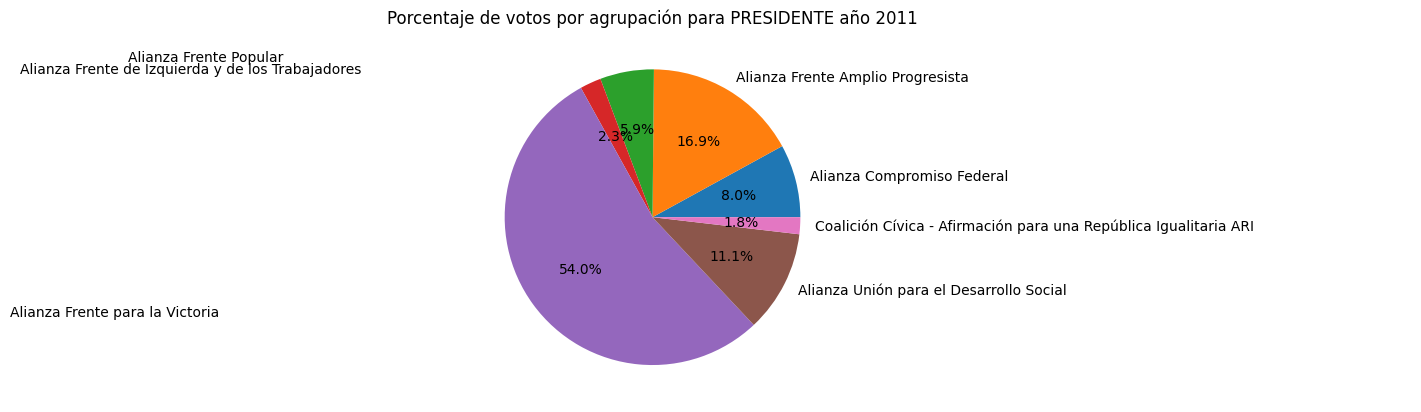

In [73]:
#Grafico torta presidencial
plt.pie(porcentaje_por_agrupacion, labels=porcentaje_por_agrupacion.index, autopct='%1.1f%%')
plt.title('Porcentaje de votos por agrupación para PRESIDENTE año '+anio_eleccion)
plt.show()

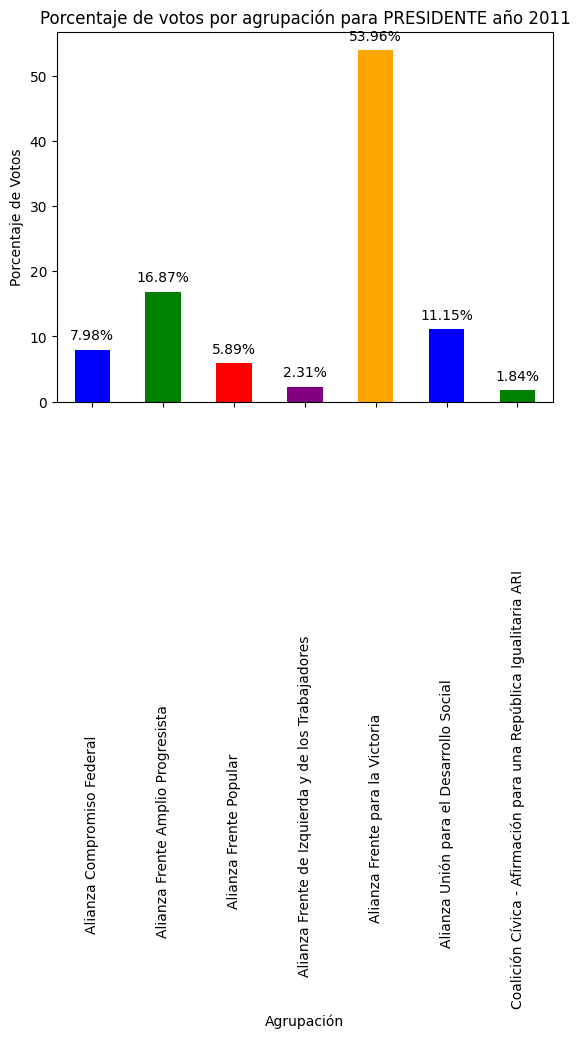

In [74]:
#Grafico de barras presidencial
colores = ['blue', 'green', 'red', 'purple', 'orange']
ax = porcentaje_por_agrupacion.plot(kind='bar',color=colores)
plt.title('Porcentaje de votos por agrupación para PRESIDENTE año '+anio_eleccion)
plt.xlabel('Agrupación')
plt.ylabel('Porcentaje de Votos')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

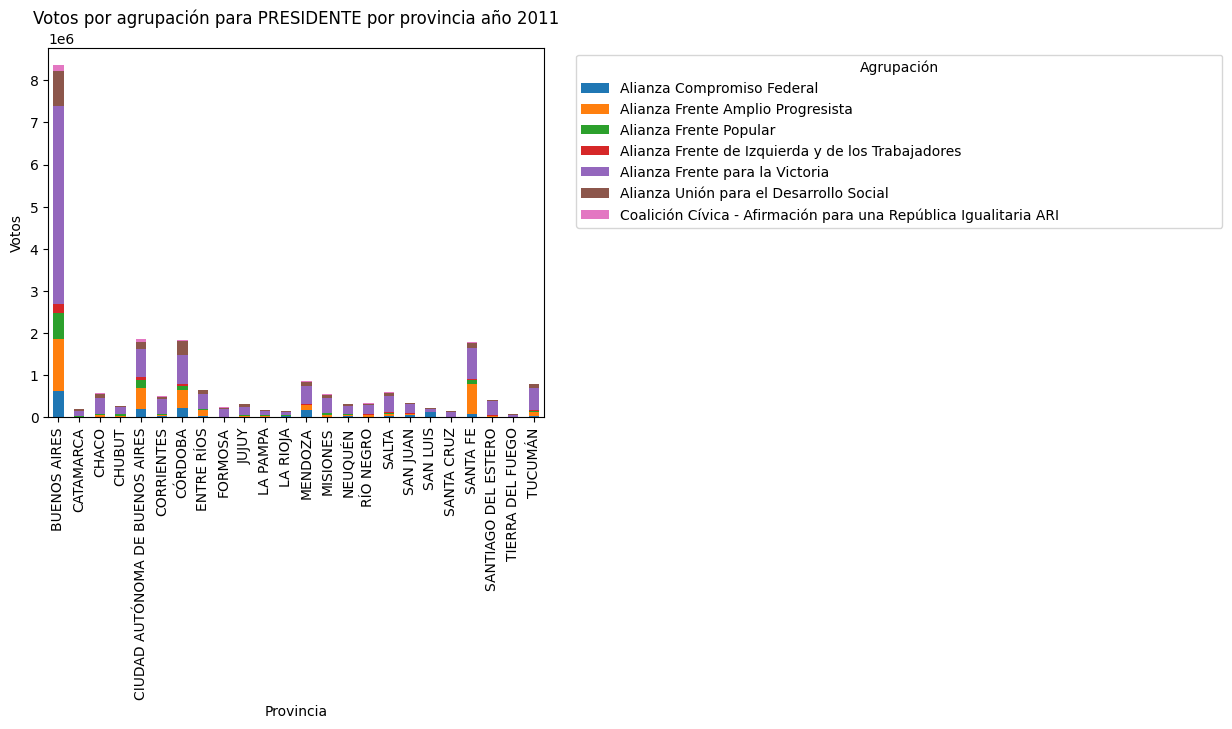

In [75]:
#Graficar todas las provincias en la categoría PRESIDENTE por agrupación
# Concatenar todos los resultados en un solo DataFrame
df_resultado_pte_prov = pd.concat(resultados_pte_prov, ignore_index=True)

# Crear un gráfico de barras apiladas por provincia
df_resultado_pte_prov.pivot_table(index='distrito_nombre', columns='agrupacion_nombre', values='votos_cantidad', fill_value=0).plot(kind='bar',stacked=True)
plt.title('Votos por agrupación para PRESIDENTE por provincia año '+anio_eleccion)
plt.xlabel('Provincia')
plt.ylabel('Votos')
plt.legend(title='Agrupación', bbox_to_anchor=(1.05, 1), loc='upper left')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [76]:
# Obtener la lista de provincias
provincias = df_resultado_pte_prov['distrito_nombre'].unique()

# Crear un gráfico de barras apiladas por provincia
for provincia in provincias:
    votos_por_provincia = df_resultado_pte_prov.sum()
    porcentaje_por_provincia = (df_resultado_pte_prov/votos_por_provincia)*100
    data_provincia = df_resultado_pte_prov[df_resultado_pte_prov['distrito_nombre'] == provincia]
    data_provincia.pivot_table(columns='agrupacion_nombre', values='votos_cantidad', fill_value=0).plot(kind='bar')
    
    plt.title(f'Votos por agrupación para PRESIDENTE en {provincia} año {anio_eleccion}')
    plt.xlabel(provincia)
    plt.ylabel('Votos')
    plt.legend(title='Agrupación', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Añadir porcentajes en cada barra
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.show()


TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [ ]:
for provincia in provincias:
    data_provincia = df_resultado_pte_prov[df_resultado_pte_prov['distrito_nombre'] == provincia]
    
    # Calcular el total de votos por provincia
    total_votos_provincia = data_provincia['votos_cantidad'].sum()
    
    # Calcular los porcentajes por provincia
    porcentaje_por_provincia = (data_provincia['votos_cantidad'] / total_votos_provincia) * 100
    
    # Resetear el índice para que 'agrupacion_nombre' no esté en el eje x
    data_provincia_reset = data_provincia.reset_index()
    
    # Crear el gráfico de barras
    data_provincia_reset.pivot_table(columns='agrupacion_nombre', values='votos_cantidad', fill_value=0).plot(kind='bar')
    
    plt.title(f'Porcentaje de votos por agrupación para PRESIDENTE en {provincia} año {anio_eleccion}')
    plt.xlabel(provincia)
    plt.ylabel('Porcentaje de Votos')
    plt.legend(title='Agrupación', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Añadir porcentajes en cada barra
    for p, porcentaje in zip(plt.gca().patches, porcentaje_por_provincia):
        plt.gca().annotate(f'{porcentaje:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.show()


